# How to Work with Large Shapefiles and Geo datasets using QGIS and Python
This notebook will first demonstrate using QGIS to split Large Shapefiles based on shapfeile metadata. Then it will give the code neccessary to take a Geo located dataset containing latitude and longitude coordinates and create a data framework for doing analysis using both of these methods.

# Pre-requirements for Splitting Shapefiles
#### 1. [Download](https://qgis.org/en/site/forusers/download.html) and install QGIS
#### 2. A Shapefile
+ The shapefile should end with the '.shp' extension and contain other meta files in the same directory (`.shx`, `.dbj`, etc.) these will vary file to file. 

# Instructions

#### 1. Launch the QGIS Application
#### 2. Click on the _New Empty Project_ panel
+ This option is highlighted in red in the image below
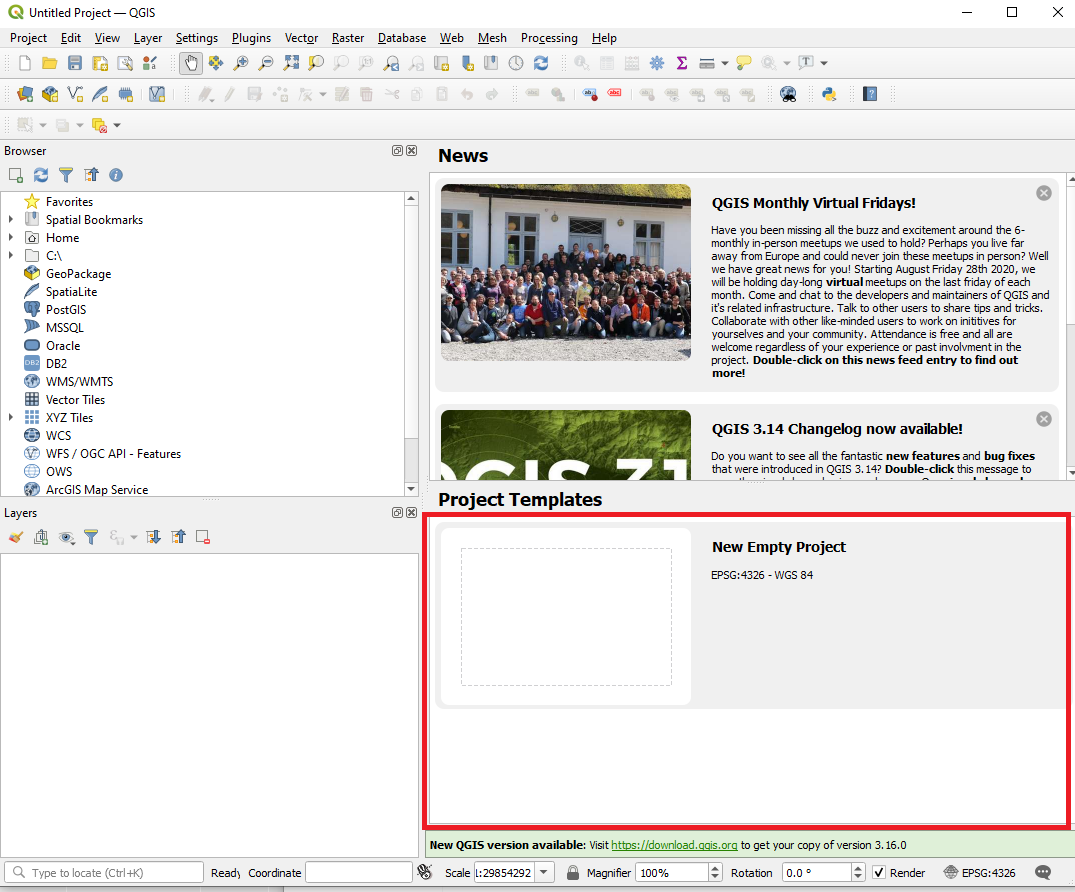
#### 3. Using the _Browser_ sidepanel, find and click on the desired Shapefile
![3.PNG](attachment:3.PNG)
#### 4. Click on _Vector→Data Management Tools→Split Vector Layer..._
![4.png](attachment:4.png)
#### 5. Configure the _Split Vector Layer_ tool settings and click _Run_
+ **_Input layer_** specifies what Layer is being used to generate the files
+ **_Unique ID field_** specifies the prefix for the generated files
+ **_Output directory_** is the directory which will contain the generated files
![5.png](attachment:5.png)
#### 6. Once the _Split Vector Layer_ tool finishes running, click on _Layer→Add Layer →Add Vector Layer..._
![Step6](Steps/6.png)
#### 7. Configure the _Data Source Manager_ accordingly
+ Ensure that it is under the _Vector_ tab is selected
+ For the **_Source Type_** option, select _File_
+ Under **_Source_** navigate and select the generated file(s)
![Step7](Steps/7.png)
#### 8. The selected file(s) should now appear as a new layer
![Step7](Steps/8.png)

In [100]:
from haversine import haversine, Unit
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import csv
import pandas as pd
import geopandas as gpd
import fiona
import os
import pprint
%matplotlib inline

In [86]:
# Convert CSV file with geo located points to DataFrame
df = pd.read_csv('population_AS47_2018-10-01.csv')

In [67]:
# Read Shapefile
india_shp = gpd.read_file("shapefiles/India_Districts_ADM2_GADM.shp")

<AxesSubplot:>

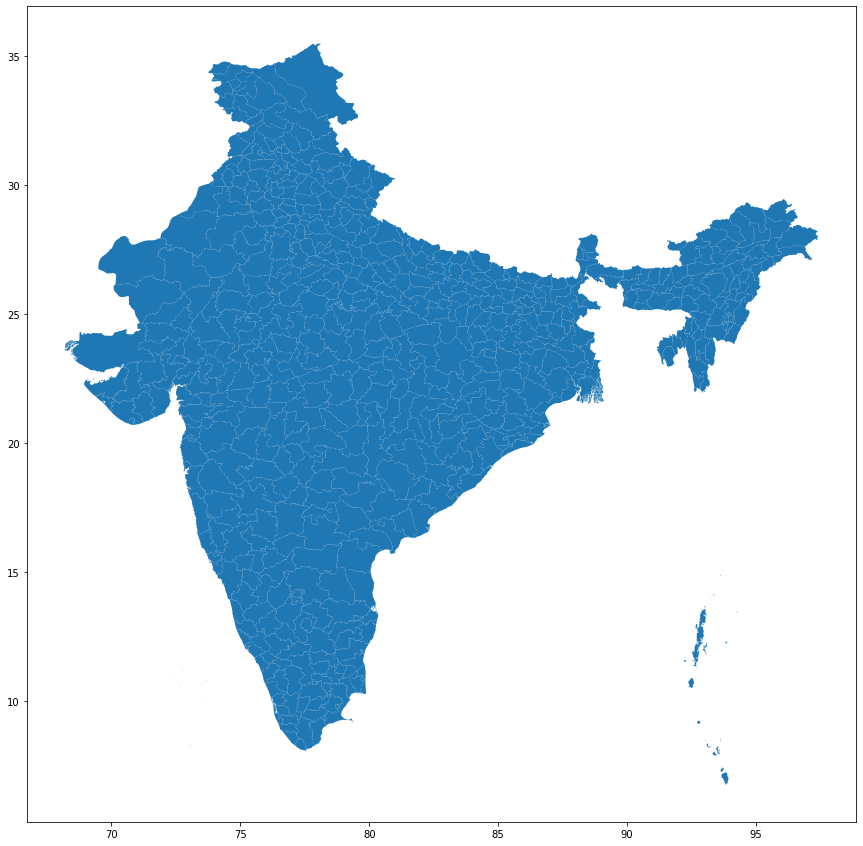

In [73]:
# display shapefile
fig, ax = plt.subplots(figsize=(15,15))
india_shp.plot(ax = ax)

In [76]:
# define coordinate System
crs = {'init': 'epsg:4326'} # coordinate reference system (long, lat)
df.head()

,latitude,longitude,population_2015,population_2020
0,23.90625,67.717917,13.270396,14.558465
1,23.90625,67.718194,13.270396,14.558465
2,23.90625,67.720139,13.270396,14.558465
3,23.90625,67.720417,13.270396,14.558465
4,23.90625,67.720972,13.270396,14.558465


In [77]:
# converting lat and long in df to coordinate shapely Points 
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [78]:
# instantiate GeoDataFrame
geo_df = gpd.GeoDataFrame(df, #dataset
                          crs=crs, #coordinate system
                          geometry=geometry) # specify geometry list
geo_df.head()

,latitude,longitude,population_2015,population_2020,geometry
0,23.90625,67.717917,13.270396,14.558465,POINT (67.71792 23.90625)
1,23.90625,67.718194,13.270396,14.558465,POINT (67.71819 23.90625)
2,23.90625,67.720139,13.270396,14.558465,POINT (67.72014 23.90625)
3,23.90625,67.720417,13.270396,14.558465,POINT (67.72042 23.90625)
4,23.90625,67.720972,13.270396,14.558465,POINT (67.72097 23.90625)


<AxesSubplot:>

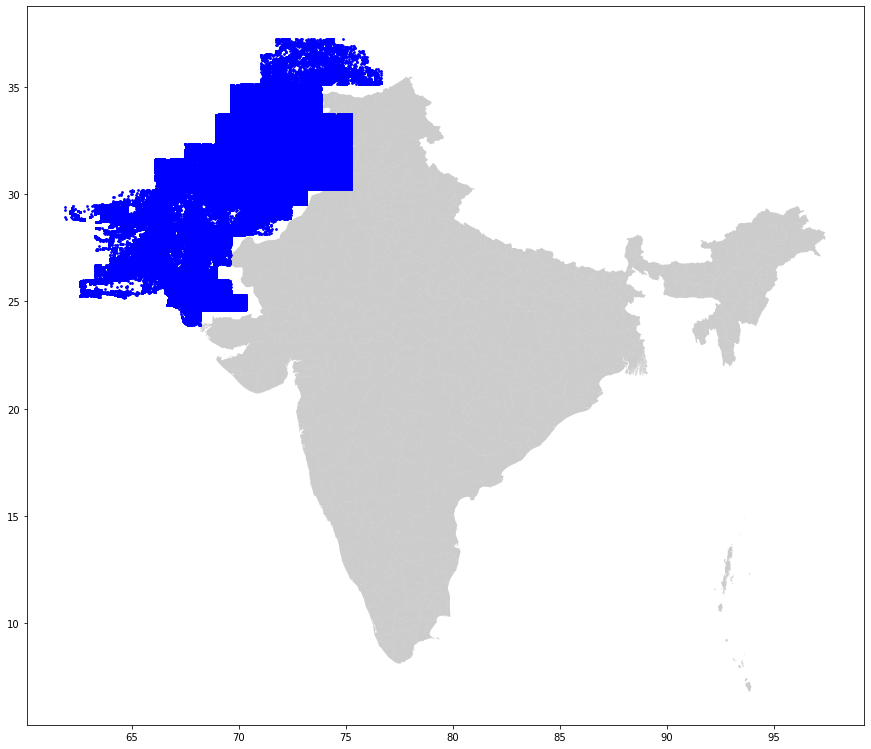

In [84]:
# Plot GeoDataFrame with points onto shapefile
fig, ax = plt.subplots(figsize=(15,15))
india_shp.plot(ax = ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, markersize=3, color='blue')

# Finding Split Shapefiles
After splitting a larger shapefile into smaller shapefiles, QGIS will use an arbitrary numbering system when saving these files. If your shapefile contains a large amount of data finding individual shapefiles can be quite tedious. The function below allows a user to search for shapefiles by property (attribute) and query. To check your shapefile's properties (attributes) in QGIS, right click on the file (.shp) and click `Open Attribute Table` 

In [1]:
def shp_lookup(shp_dir, search_prop, query):
    """
    function that returns name of shapefile (.shp) associated with a particualar field
    If looking for shp by city, use

    Args:
        shp_dir : str
            location of shapefiles to be searched
        
        search_prop : str
            field to search for in shapefiles
            (city: 'NAME_2')
            (region/state: 'NAME_1')
        
        query : str
            string to be searched for i.e. 'Delhi'

    Returns:
        str : filename of shapefile
    """
    for filename in os.listdir(shp_dir):
        if filename.endswith(".shp"):
            with fiona.open(shp_dir + filename) as src:
                if src[0]['properties'][search_prop] == query:
                    return filename
    return "No shapefile exists"

In [138]:
shp_lookup(r'shapefiles/regions/', 'NAME_2', 'Delhi')

'NAME_2_145.shp'